<a href="https://colab.research.google.com/github/dakshpat/Final-Project-Phys-240-/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINAL PROJECT: CELL SURVIVAL MODELING**

The code below shows a plot of the MTSH model with with D0 and n parameters. This is to play around with different parameters values to see what the graph looks like

**MTSH MODEL:** 

$ \frac{S}{S_0} = ne^\frac{D}{D_0} $

n = is the number of targets

$D_0 $ = dose at which there is on average one hit per target. Graphycally it is the slope of the linear portion of the plot

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import matplotlib as mpl

In [12]:
#Paramenters

n = 6
d0 = 54 #units of Gy 

Creating an x-range, and calculating the y values. 

In [13]:
x_range = np.arange(0, 10, .5)
y_range = -n*np.exp(x_range/d0)


The next bit is to just plot the data

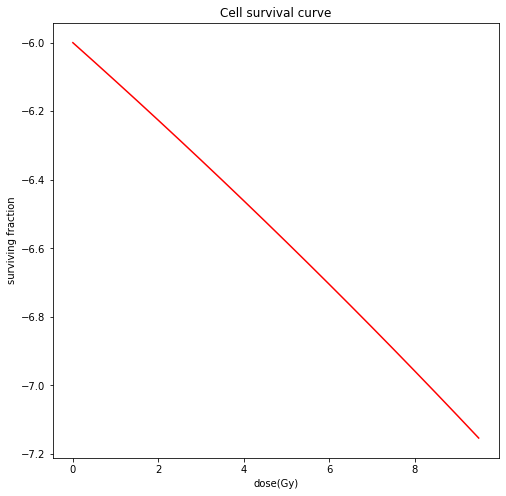

In [14]:
plt.plot(x_range, y_range, 'r')
plt.title("Cell survival curve")
plt.xlabel("dose(Gy)")
plt.ylabel("surviving fraction")
plt.show

mpl.rcParams['figure.figsize'] = [8, 8]

**Part:2**

The code below is to read a file that has all the data and then plots the data.

<function matplotlib.pyplot.show>

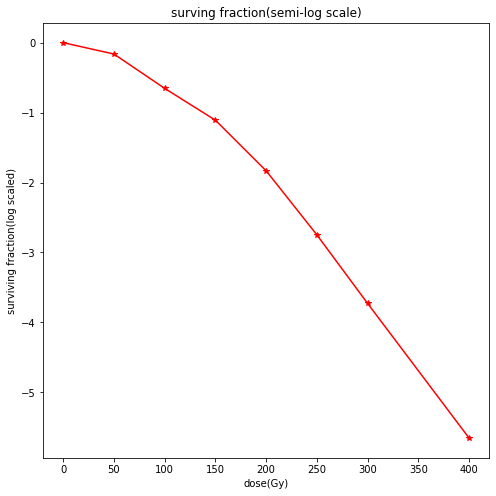

In [40]:
x_data, y_data =np.loadtxt('https://raw.githubusercontent.com/dakshpat/Final-Project-Phys-240-/main/data1.txt', delimiter = ',', unpack= True )

plt.plot(x_data, np.log(y_data), 'r*-')
plt.title("surving fraction(semi-log scale)")
plt.xlabel("dose(Gy)")
plt.ylabel("surviving fraction(log scaled)")
plt.show

Input an estimate of cutoff dose where the plot above starts to look linear. And picking all data point to the right of that estimate.

<function matplotlib.pyplot.show>

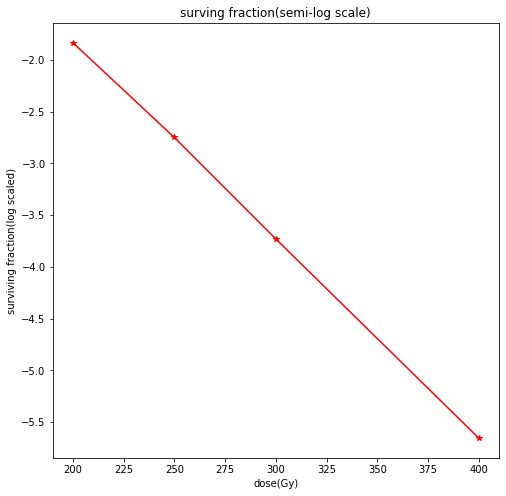

In [41]:
#input for the cutoff dose estimate 

cutoff_dose = 175

x_interpol = []
y_interpol = []

counter = 0
for i in x_data: 
  if (i > cutoff_dose):
    x_interpol.append(i)
    y_interpol.append(np.log(y_data[counter]))
    counter +=1
  else: 
    counter +=1

#plots the data you want for the linear interpolation
plt.plot(x_interpol, y_interpol, 'r*-')
plt.title("surving fraction(semi-log scale)")
plt.xlabel("dose(Gy)")
plt.ylabel("surviving fraction(log scaled)")
plt.show

Interpolation part, takes the specificed data above and linearly interpolates, turing on the fill value so that we can extrapolate to the x & y-intercept

<function matplotlib.pyplot.show>

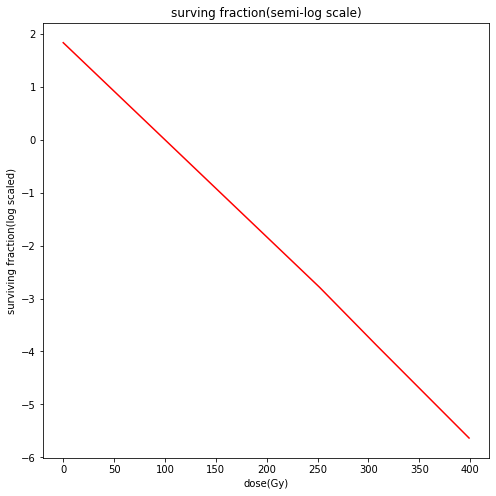

In [42]:
#interpolation 

xmax = max(x_interpol)        #gives me the upper bound of the x values I need
x_new = np.arange(0, xmax)
f_linear = interpolate.interp1d(x_interpol, y_interpol, kind='linear', fill_value='extrapolate')
y_new = f_linear(x_new)

plt.plot(x_new, y_new, 'r-')
plt.title("surving fraction(semi-log scale)")
plt.xlabel("dose(Gy)")
plt.ylabel("surviving fraction(log scaled)")
plt.show

Calculating the parameter values, as well as compleated model

In [72]:
#finding parameter D0
sampling = 200 #specifing where to take the slope
slope = (y_new[sampling]-y_new[sampling-1])/(x_new[sampling]-x_new[sampling-1])
D_0 = - 1/slope
print("D0 equals: %5.2fGy" %D_0)

#finding parameter n 
n = np.exp(f_linear(0))
print("n equals: %5.2f" %n)

#finding parameter Dq
Dq = D_0*f_linear(0)
print("Dq equals: %5.2fGy" %Dq)

print("Using the MTSH model the data approxmatily fits the function: S=%5.2f*e^(-D/ %5.2f)" %(n,D_0))

D0 equals: 3255.21Gy
n equals:  1.16
Dq equals: 483.33Gy
Using the MTSH model the data approxmatily fits the function: S= 1.16*e^(-D/ 3255.21)


**Part:3**

Modeling an Elkind sutton experiment where a initial conditioning dose is given and ploting the data. 

<function matplotlib.pyplot.show>

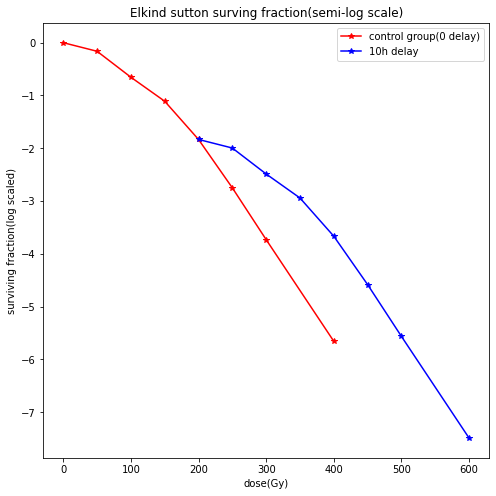

In [65]:
#reads the data for the control group
x_control, y_control =np.loadtxt('https://raw.githubusercontent.com/dakshpat/Final-Project-Phys-240-/main/data1.txt', delimiter = ',', unpack= True )

#reads the data for the experimental group
x_data, y_data =np.loadtxt('https://raw.githubusercontent.com/dakshpat/Final-Project-Phys-240-/main/data1.txt', delimiter = ',', unpack= True )

#input conditioning dose
c_dose = 200 #Gy

#finds the surviving fraction for the contidional dose in the control group. This will be the starting point of the for the non-control group
starting_fraction = 0
counter = 0
for i in x_control:
  if(i == c_dose):
    starting_fraction = y_control[counter]
  counter += 1

x_data = 200 + x_data
y_data = starting_fraction*y_data

plt.plot(x_control, np.log(y_control), 'r-*')
plt.plot(x_data, np.log(y_data), 'b-*')
plt.title("Elkind sutton surving fraction(semi-log scale)")
plt.xlabel("dose(Gy)")
plt.ylabel("surviving fraction(log scaled)")
plt.legend(["control group(0 delay)","10h delay" ])
plt.show

In [71]:
#linear interploation of the experimental group 

cutoff_dose = 400  #estimate where the linear portion starts

x_inter = np.array([])
y_inter = np.array([])

counter = 0
for i in x_data: 
  if (i >= cutoff_dose):
    x_inter = np.append(x_inter, i)
    y_inter = np.append(y_inter, y_data[counter])
    counter +=1
  else: 
    counter +=1

xmax = max(x_inter)        #gives me the upper bound of the x values I need
x_new = np.arange(0, xmax)
f_linear = interpolate.interp1d(x_inter, y_inter, kind='linear', fill_value='extrapolate')
y_new = f_linear(x_new)

#linear interpolation of the control group

cutoff_dose = 200  #estimate where the linear portion starts
x_inter1 = np.array([])
y_inter1 = np.array([])

counter = 0
for i in x_control: 
  if (i >= cutoff_dose):
    x_inter1 = np.append(x_inter1, i)
    y_inter1 = np.append(y_inter1, y_control[counter])
    counter +=1
  else: 
    counter +=1

xmax = max(x_inter1)        #gives me the upper bound of the x values I need
x_new1 = np.arange(0, xmax)
f_linear1 = interpolate.interp1d(x_inter1, y_inter1, kind='linear', fill_value='extrapolate')
y_new1 = f_linear1(x_new1)

#comparing the parameters from the two group
sampling = 200 #specifing where to take the slope

#Slope of the experimental group
slope = (y_new[sampling]- y_new[sampling-1])/(x_new[sampling]-x_new[sampling-1])

#slope of the control grope 
slope1 = (y_new1[sampling]- y_new1[sampling-1])/(x_new1[sampling]-x_new1[sampling-1])

#finding parameter n 
n1 = np.exp(f_linear1(0))
n =  np.exp(f_linear(0))

if (abs(n-n1) <= 1):
  print("Repair of the cell damadge is complete, so sufficient time has passed")
elif (n == 1 ):
  print("repair has not begun yet")
else: 
  print("insufficient time has passed for repair to complete")


Repair of the cell damadge is complete, so sufficient time has passed


In [75]:
print("n for the control group equals: ", n1)
print("n for the experimental group equals: ", n)
print("slope for the control group equals: ", slope1)
print("slope for the experimental group equals: ", slope)

n for the control group equals:  1.7228846360108874
n for the experimental group equals:  1.1600695961504885
slope for the control group equals:  -0.001920000000000005
slope for the experimental group equals:  -0.00030720000000000747
